In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from lvl.datasets import poisson_lorenz
data, rates, readout, latents = poisson_lorenz(
    1000, 3000, latent_noise_scale=1.0, min_rate=0.1, max_rate=2.0, dt=0.005)

# Sort neurons lexographically by the readout
data = data.T[np.lexsort(readout)]
rates = rates.T[np.lexsort(readout)]

Text(0.5, 1.0, 'True latent trajectory')

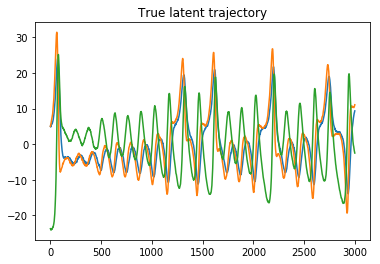

In [3]:
plt.plot(latents)
plt.title("True latent trajectory")

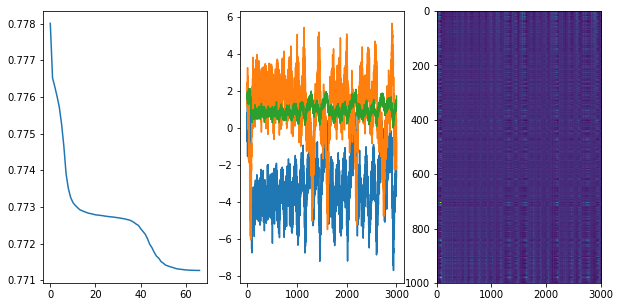

In [19]:
from lvl.factor_models import PoissonMF

# Fit model with no smoothing.
model = PoissonMF(n_components=3, tol=1e-6)
model.fit(data)

# Plot model fit.
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
axes[0].plot(model.loss_hist[1:])
axes[1].plot(model.factors[1].T)
axes[2].imshow(model.predict(), aspect='auto')

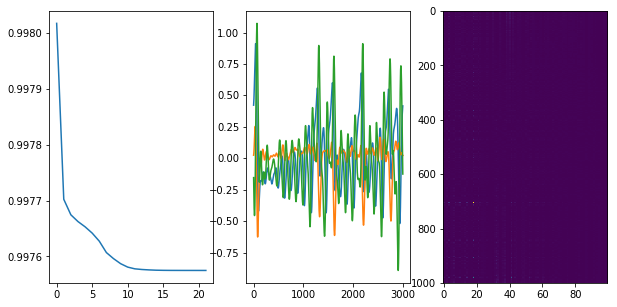

In [21]:
from lvl.basis_funcs import truncated_fourier
rdata, S = truncated_fourier(data, 50)

# Re-fit model with truncated Fourier basis
model = PoissonMF(n_components=3, tol=1e-8)
model.fit(data, Vbasis=S)

# Plot model fit.
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
axes[0].plot(model.loss_hist[1:])
axes[1].plot(np.dot(model.factors[1], S).T)
axes[2].imshow(model.predict(), aspect='auto')

100%|██████████| 10/10 [01:04<00:00,  6.63s/it]


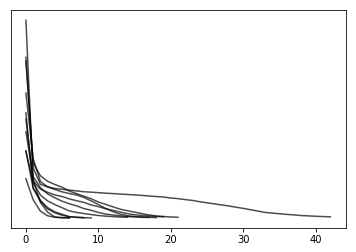

In [26]:
from tqdm import trange
model = PoissonMF(n_components=3, tol=1e-6)

losses = []
for n in trange(10):
    model.fit(data, Vbasis=S)
    plt.plot(model.loss_hist[1:], color='k', alpha=.7)

plt.yscale('log')